# 1. Context 

Usage With Surya OCR

In [1]:
from PIL import Image
import cv2
from surya.recognition import RecognitionPredictor
from surya.detection import DetectionPredictor
from surya.layout import LayoutPredictor

/mnt/CFS2/spark/indic_document_extraction/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
print(os.listdir("../../sample_images/hindi"))

['textbook_digital_hindi_01.png', 'textbook_digital_hindi_02.png', 'legal_digital_hindi_06.png', 'legal_scanned_handwritten_hindi_08.png', 'textbook_digital_hindi_04.png', 'textbook_digital_hindi_03.png', 'book_scanned_hindi_15.png', 'legal_digital_hindi_05.png', 'book_scanned_handwritten_hindi_14.png', 'academic_digital_hindi_11.png', 'academic_scanned_hindi_10.png', 'book_scanned_hindi_09.png', 'book_scanned_hindi_12.png', 'book_handwritten_hindi_13.png', 'legal_digital_hindi_07.png']


In [3]:
file_path = "../../sample_images/hindi/book_scanned_hindi_12.png"
cv_image = cv2.imread(file_path)
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(cv_image_rgb)

## 1. OCR (Text Recognition)

In [4]:
recognition_predictor = RecognitionPredictor()
detection_predictor = DetectionPredictor()

# 2. Recognition and Layout Predictor

In [5]:
predictions = recognition_predictor([image], det_predictor=detection_predictor)

Recognizing Text: 100%|██████████| 29/29 [09:10<00:00, 18.98s/it]


In [6]:
layout_predictor = LayoutPredictor()

# layout_predictions is a list of dicts, one per image
layout_predictions = layout_predictor([image])

Recognizing layout: 100%|██████████| 1/1 [00:18<00:00, 18.80s/it]


In [ ]:
prediction = layout_predictions[0]
print (prediction)
print (predictions)

bboxes=[LayoutBox(polygon=[[276.40709191560745, 23.292348861694336], [503.6155259013176, 23.292348861694336], [503.6155259013176, 54.31995169445872], [276.40709191560745, 54.31995169445872]], confidence=0.5992966294288635, label='PageHeader', position=0, top_k={'PageHeader': 0.5992966294288635, 'Text': 0.3995939791202545, 'SectionHeader': 0.0005261642509140074, 'TableOfContents': 0.00021771028696093708, 'Footnote': 0.0001353814877802506}, bbox=[276.40709191560745, 23.292348861694336, 503.6155259013176, 54.31995169445872]), LayoutBox(polygon=[[10.807566404342651, 94.30150540173054], [788.4562899470329, 94.30150540173054], [788.4562899470329, 211.56236793100834], [10.807566404342651, 211.56236793100834]], confidence=0.9999023675918579, label='Text', position=1, top_k={'Text': 0.9999023675918579, 'PageHeader': 5.609836443909444e-05, 'ListItem': 8.808555321593303e-06, 'PageFooter': 7.129631285351934e-06, 'TextInlineMath': 6.709271929139504e-06}, bbox=[10.807566404342651, 94.30150540173054,

In [8]:
from pprint import pprint
print(type(prediction))
pprint(prediction.dict(), sort_dicts=False)


<class 'surya.layout.schema.LayoutResult'>
{'bboxes': [{'polygon': [[276.40709191560745, 23.292348861694336],
                         [503.6155259013176, 23.292348861694336],
                         [503.6155259013176, 54.31995169445872],
                         [276.40709191560745, 54.31995169445872]],
             'confidence': 0.5992966294288635,
             'label': 'PageHeader',
             'position': 0,
             'top_k': {'PageHeader': 0.5992966294288635,
                       'Text': 0.3995939791202545,
                       'SectionHeader': 0.0005261642509140074,
                       'TableOfContents': 0.00021771028696093708,
                       'Footnote': 0.0001353814877802506},
             'bbox': [276.40709191560745,
                      23.292348861694336,
                      503.6155259013176,
                      54.31995169445872]},
            {'polygon': [[10.807566404342651, 94.30150540173054],
                         [788.4562899470329, 94.301

/tmp/ipykernel_496486/109906678.py:3: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(prediction.dict(), sort_dicts=False)


In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

color_map = {
    "Title": "red",
    "Text": "green",
    "Figure": "blue",
    "Table": "orange",
    "Caption": "purple"
}


In [10]:
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

def show_image(image, prediction):
    fig, ax = plt.subplots(figsize=(20, 24))
    canvas = FigureCanvas(fig)  # Explicitly attach a canvas to the figure
    ax.imshow(image)

    for box in prediction.bboxes:
        polygon = box.polygon
        poly_patch = Polygon(polygon, closed=True, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(poly_patch)

        if hasattr(box, "type"):
            label = box.type
            x, y = polygon[0]
            ax.text(x, y, label, color='blue', fontsize=12, backgroundcolor='white')

    ax.axis('off')
    canvas.draw()

    # Convert to numpy array
    width, height = fig.canvas.get_width_height()
    layout_img = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8).reshape(height, width, 4)[..., :3]

    plt.close(fig)
    return layout_img


In [11]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

def visualize_ocr_with_hindi_rendering(image, ocr_result):
    canvas = Image.new('RGB', (image.width, image.height), (255, 255, 255))
    draw = ImageDraw.Draw(canvas)

    font_path = "../../fonts/NotoSansDevanagari-Regular.otf"
    font = ImageFont.truetype(font_path, size=20)

    for line in ocr_result.text_lines:
        text = line.text
        if not text.strip():
            continue

        xs = [p[0] for p in line.polygon]
        ys = [p[1] for p in line.polygon]
        x = min(xs)
        y = min(ys)

        draw.text((x, y), text, fill=(0, 0, 0), font=font)

    return canvas  # Return PIL image


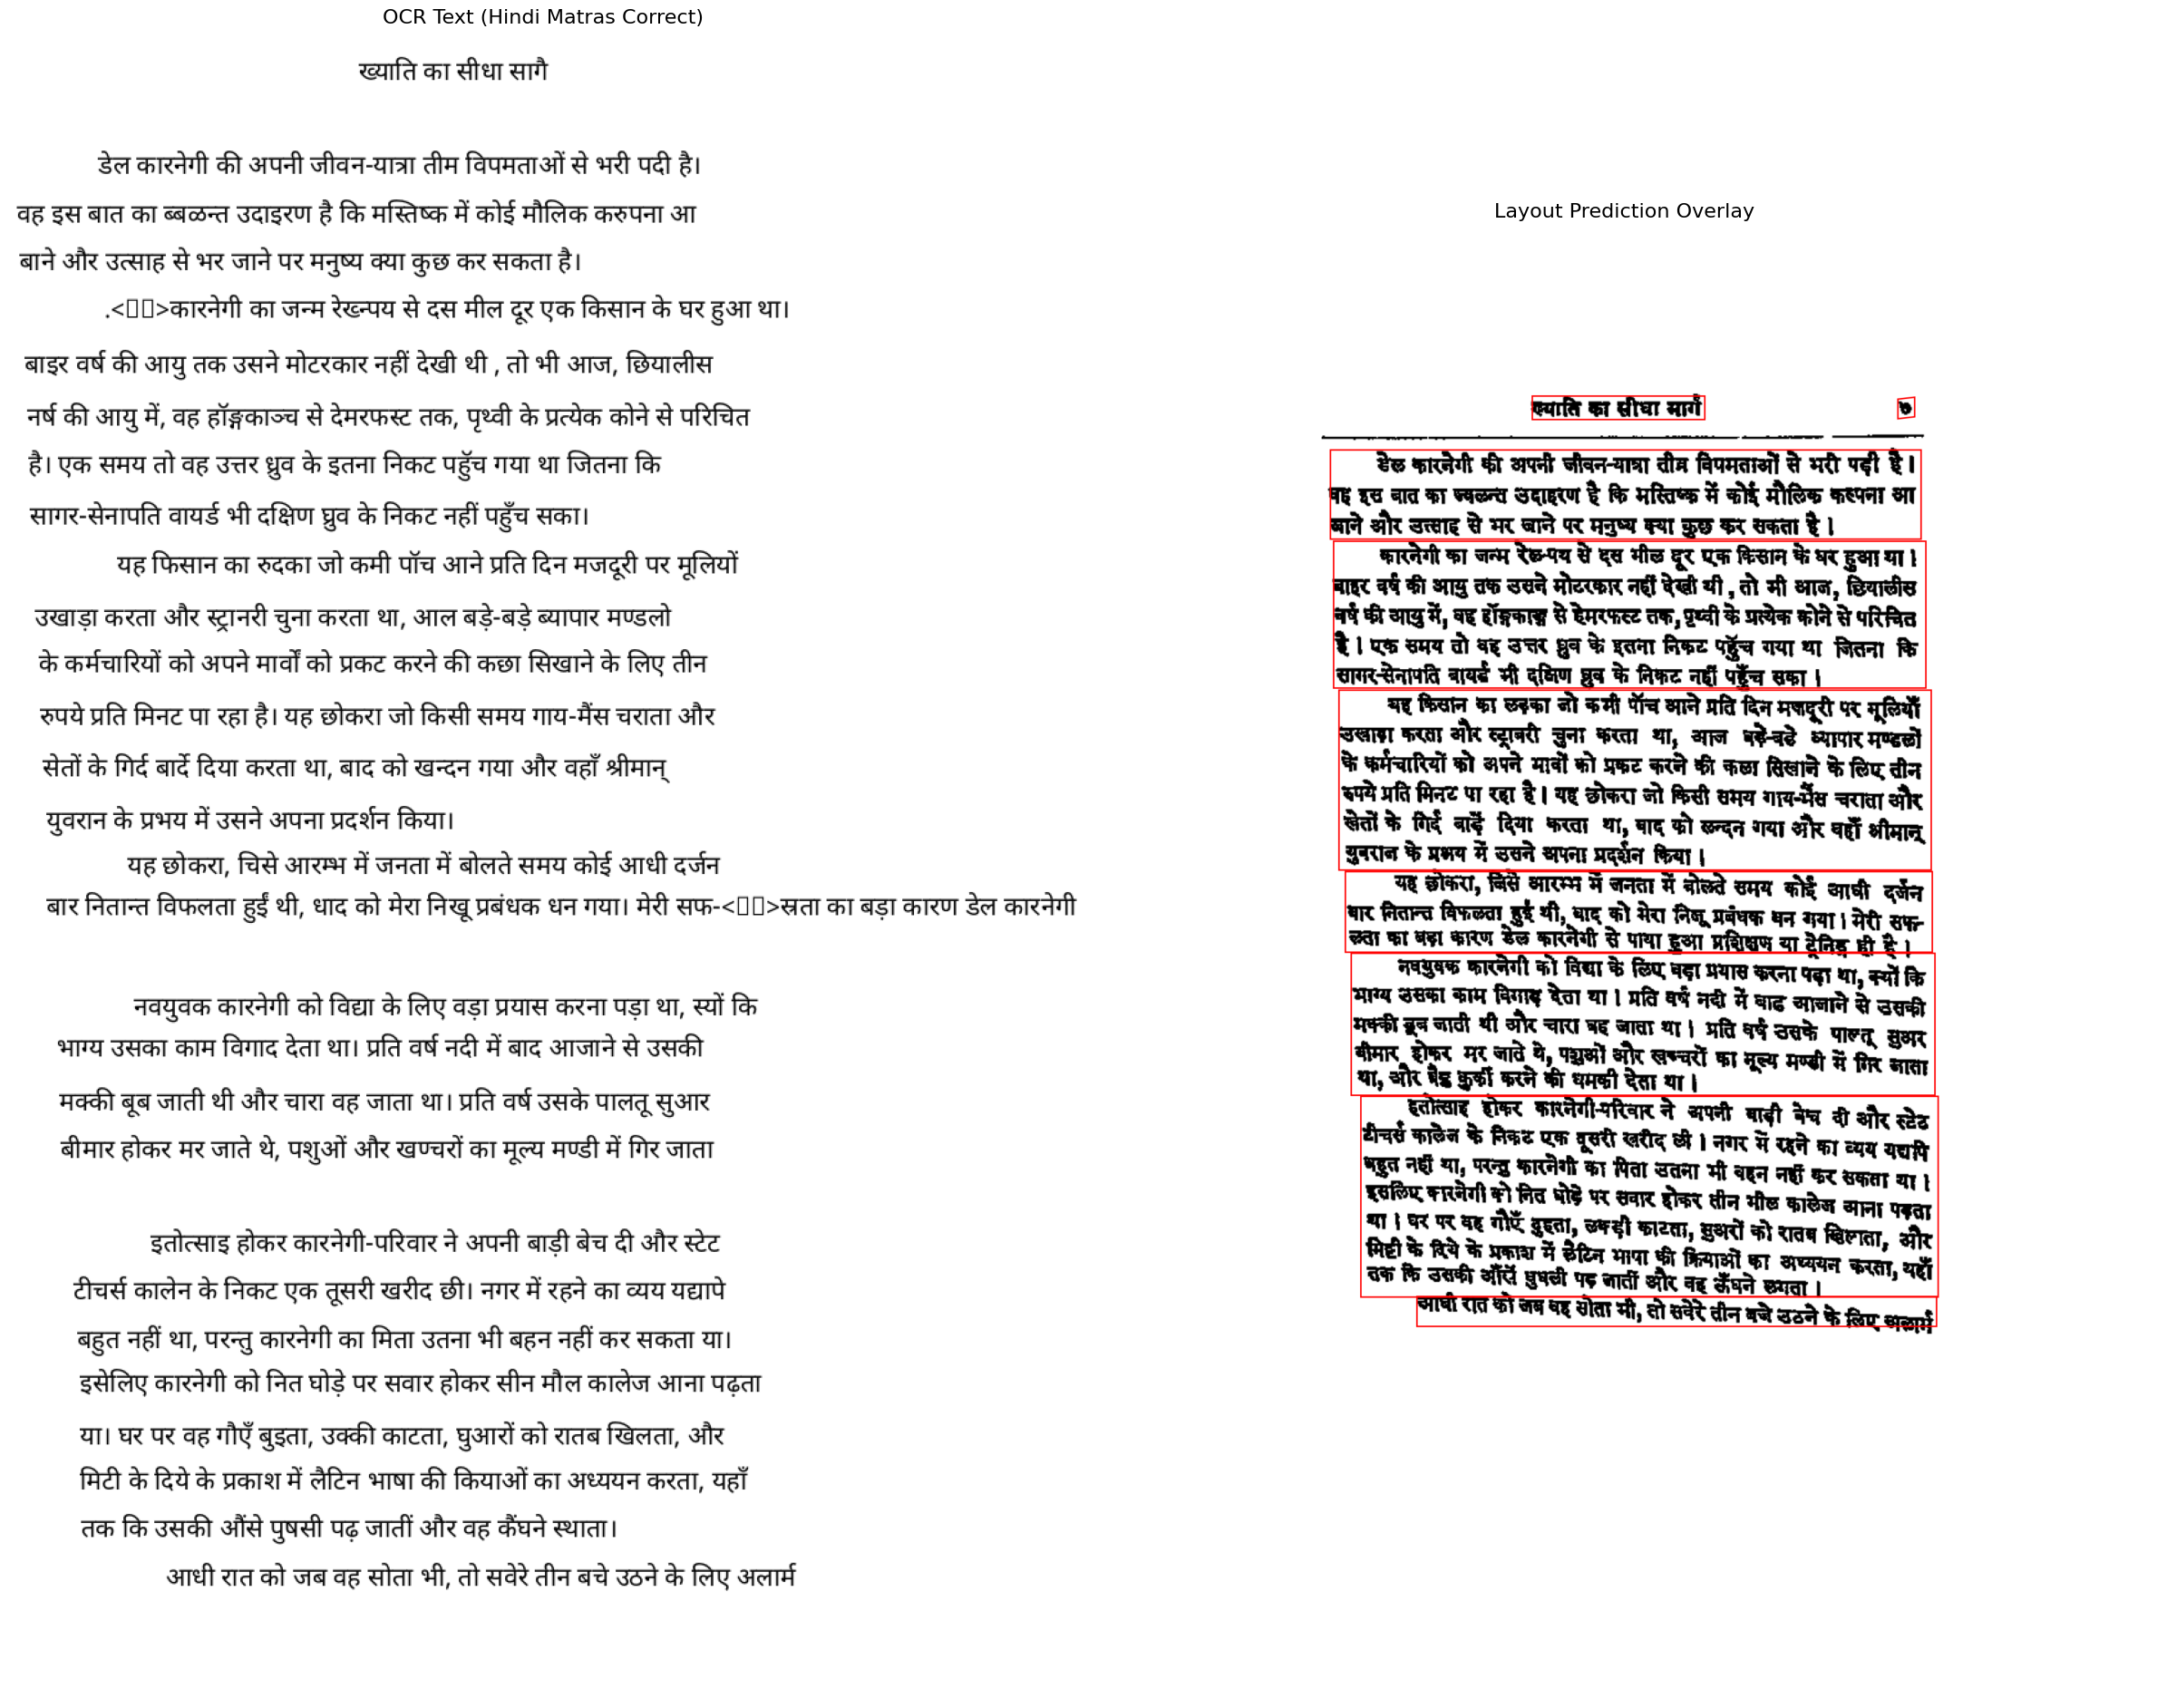

In [12]:
def show_side_by_side(ocr_canvas, layout_overlay):
    fig, axes = plt.subplots(1, 2, figsize=(24, 20))

    axes[0].imshow(ocr_canvas)
    axes[0].set_title("OCR Text (Hindi Matras Correct)", fontsize=16)
    axes[0].axis('off')

    axes[1].imshow(layout_overlay)
    axes[1].set_title("Layout Prediction Overlay", fontsize=16)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


ocr_canvas = visualize_ocr_with_hindi_rendering(image, predictions[0])
layout_overlay = show_image(image, prediction)

show_side_by_side(ocr_canvas, layout_overlay)


# 3. Detection Predictor

In [22]:
detection_predictions = detection_predictor([image]) 

Detecting bboxes: 100%|██████████| 1/1 [00:06<00:00,  6.38s/it]


In [25]:
from pprint import pprint
print(type(detection_predictions))
pprint(detection_predictions[0].dict(), sort_dicts=False)

<class 'list'>
{'bboxes': [{'polygon': [[272, 21], [504, 21], [504, 49], [272, 49]],
             'confidence': 0.9767717719078064,
             'bbox': [272, 21, 504, 49]},
            {'polygon': [[69, 94], [784, 94], [784, 129], [69, 129]],
             'confidence': 0.9683513641357422,
             'bbox': [69, 94, 784, 129]},
            {'polygon': [[6, 132], [785, 132], [785, 169], [6, 169]],
             'confidence': 0.9948607087135315,
             'bbox': [6, 132, 785, 169]},
            {'polygon': [[9, 169], [676, 176], [676, 215], [8, 208]],
             'confidence': 0.9876998066902161,
             'bbox': [8, 169, 676, 215]},
            {'polygon': [[74, 206], [785, 216], [785, 257], [74, 247]],
             'confidence': 0.9873837232589722,
             'bbox': [74, 206, 785, 257]},
            {'polygon': [[12, 249], [787, 253], [787, 293], [12, 289]],
             'confidence': 0.9946402311325073,
             'bbox': [12, 249, 787, 293]},
            {'polygon': [

/tmp/ipykernel_496486/847152404.py:3: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(detection_predictions[0].dict(), sort_dicts=False)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_detections(image, detection_result):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(image)

    for box in detection_result.bboxes:
        x1, y1, x2, y2 = box.bbox
        rect = Rectangle((x1, y1), x2 - x1, y2 - y1,
                         linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)


    ax.axis('off')
    plt.show()


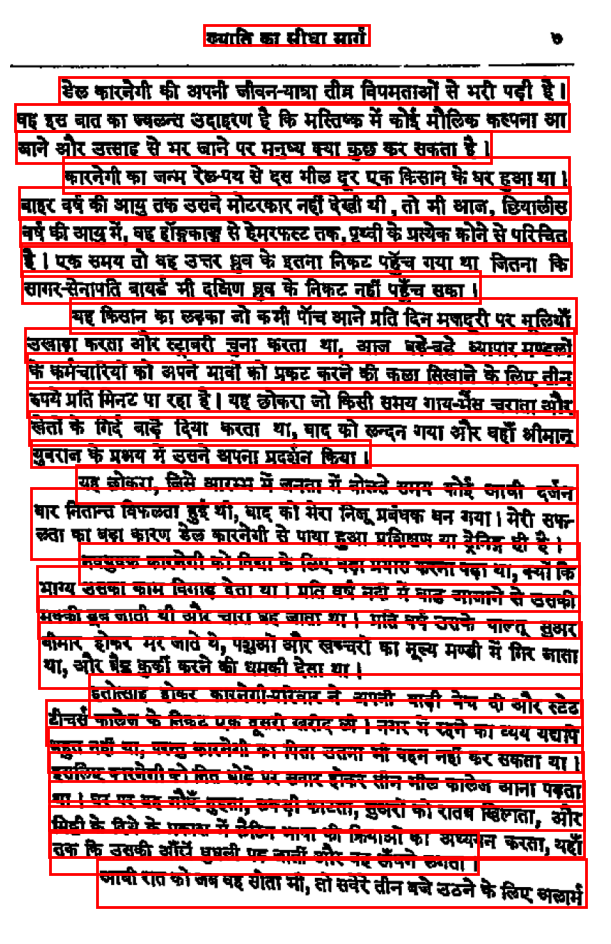

In [32]:
visualize_detections(image , detection_predictions [0])